In [1]:
import sys

In [2]:
!{sys.executable} -m pip install bignmf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 10.7 MB/s eta 0:00:00
DEPRECATION: mieaa 0.3.0 has a non-standard dependency specifier requests>=2.19.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mieaa or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
from bignmf.models.jnmf.integrative import IntegrativeJnmf
from bignmf.datasets.datasets import Datasets

In [2]:
Datasets.list_all()

SimulatedX1
SimulatedX3
SimulatedX2


In [3]:
data_dict = {}
data_dict["sim1"] = Datasets.read("SimulatedX1")
data_dict["sim2"] = Datasets.read("SimulatedX2")

In [4]:
k = 3
iter =100
trials = 50
lamb = 0.1

In [5]:

model = IntegrativeJnmf(data_dict, k, lamb)

In [6]:
# Runs the model
model.run(trials, iter, verbose=0)
print(model.error)

0.7624403416728189


In [7]:
# Clusters the data
model.cluster_data()
print(model.h_cluster)

{'sim1':            1    2    4   12   14   15   20   21   24   26  ...   88   94  105  \
class-0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
class-1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
class-2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   

         108  110  116  117  118  120  127  
class-0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
class-1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
class-2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 130 columns], 'sim2':            1    4    5    7    8   10   11   12   14   22  ...  135  137  144  \
class-0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
class-1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
class-2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   

         145  146  148  159  160  166  168  
class-0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
class-1  0.0  0.0  0.0  0.0  0.0  0.0 

In [8]:
#Calculates the consensus matrices
model.calc_consensus_matrices() 
print(model.consensus_matrix_w)

[[1.   0.88 0.74 ... 0.   0.   0.06]
 [0.88 1.   0.78 ... 0.   0.   0.08]
 [0.74 0.78 1.   ... 0.   0.   0.02]
 ...
 [0.   0.   0.   ... 1.   1.   0.66]
 [0.   0.   0.   ... 1.   1.   0.66]
 [0.06 0.08 0.02 ... 0.66 0.66 1.  ]]


In [9]:
model.consensus_matrix_w.shape

(45, 45)

In [10]:
import seaborn as sns

<Axes: >

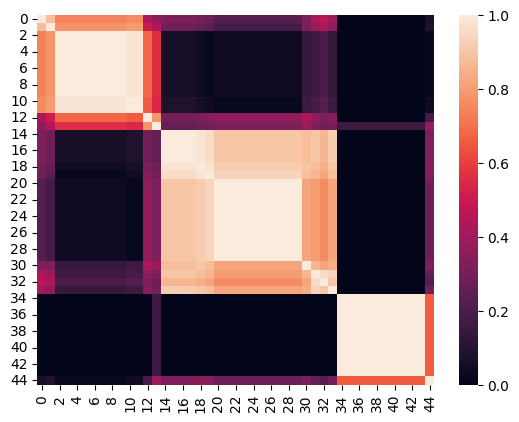

In [11]:
sns.heatmap(model.consensus_matrix_w)